In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install tensorflow

In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [5]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
from google.colab import files

#upload files into Colaboratory
uploaded = files.upload()


Saving sampleSubmission.csv to sampleSubmission.csv
Saving trainLabels.csv to trainLabels.csv


In [8]:
#read cvs file into dataframe
samplesub = pd.read_csv('sampleSubmission.csv')
train=pd.read_csv('trainLabels.csv')


print(train)

          id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

In [0]:
import random
i=random.randint(1,50000)

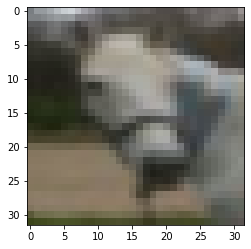

In [14]:
plt.imshow(X_train[i])

In [15]:
print(y_train[i])

[7]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


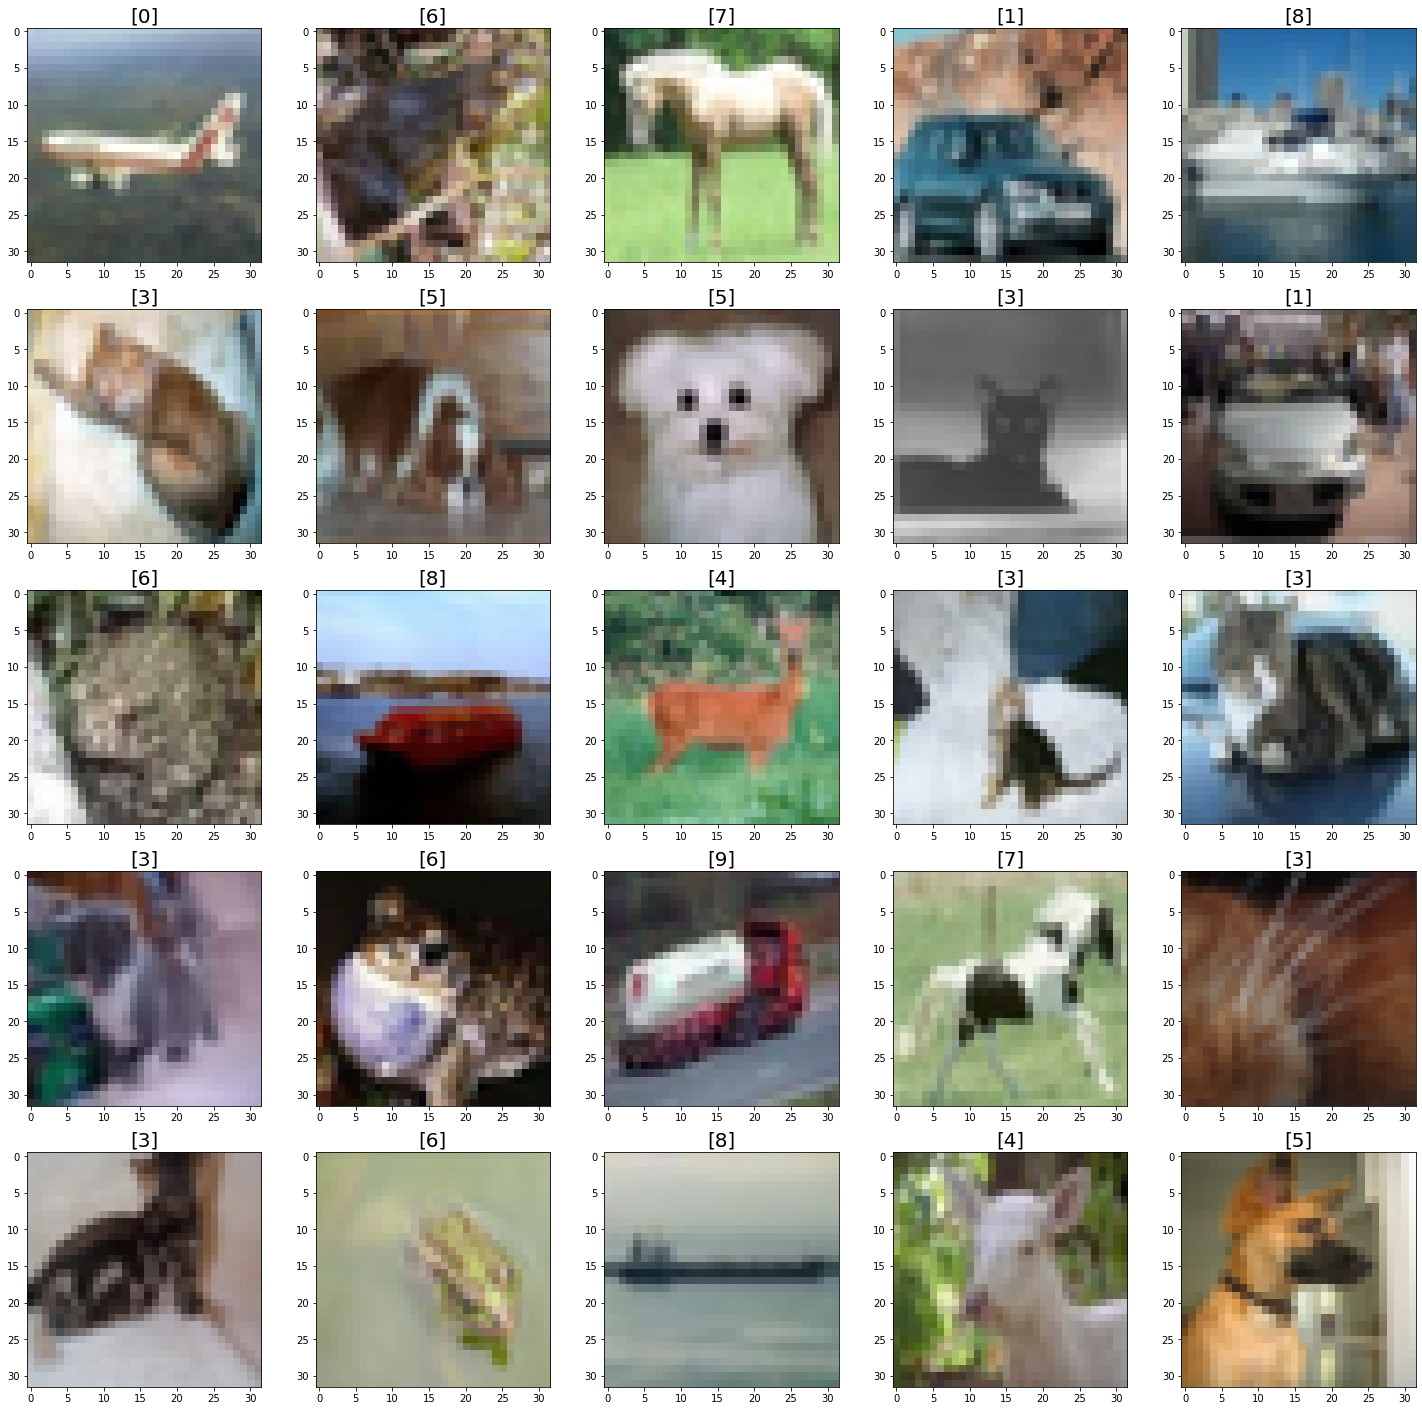

In [16]:
w=5
l=5
fig, axes=plt.subplots(l,w,figsize=(25,25))
axes=axes.ravel()
for i in np.arange(0,(l*w)):
  index=np.random.randint(0,len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index],fontsize=20)


In [17]:
type(y_train)

numpy.ndarray

In [0]:
X_test=X_test/255
X_train=X_train/255



In [19]:
from keras.utils import np_utils 

y_train = np_utils.to_categorical(y_train)  
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]
print(num_classes)

10


In [22]:
y_train.shape
X_train.shape

(50000, 32, 32, 3)

In [0]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam


In [33]:
cls=Sequential()
cls.add(Conv2D(32,3,3,input_shape=(32,32,3),activation='relu'))
cls.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
cls.add(Dropout(0.2))

cls.add(Conv2D(32,(3,3),activation='relu'))
cls.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
cls.add(Dropout(0.2))

cls.add(Conv2D(32,(3,3),activation='relu'))
cls.add(MaxPooling2D(pool_size=(2,2)))
cls.add(Dropout(0.2))
cls.add(Flatten())
cls.add(Dense(output_dim=128,activation='relu'))
cls.add(Dense(output_dim=10,activation='sigmoid'))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  from ipykernel import kernelapp as app


In [87]:
cls.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
r=cls.fit(X_train,y_train,epochs=30,batch_size=30,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 12s 301us/step - loss: 0.1361 - acc: 0.9471 - val_loss: 0.1121 - val_acc: 0.9567
Epoch 2/30
40000/40000 [==============================] - 11s 280us/step - loss: 0.1346 - acc: 0.9476 - val_loss: 0.1121 - val_acc: 0.9570
Epoch 3/30
40000/40000 [==============================] - 11s 278us/step - loss: 0.1357 - acc: 0.9472 - val_loss: 0.1121 - val_acc: 0.9569
Epoch 4/30
40000/40000 [==============================] - 11s 283us/step - loss: 0.1355 - acc: 0.9473 - val_loss: 0.1135 - val_acc: 0.9562
Epoch 5/30
40000/40000 [==============================] - 11s 279us/step - loss: 0.1346 - acc: 0.9476 - val_loss: 0.1143 - val_acc: 0.9561
Epoch 6/30
40000/40000 [==============================] - 11s 281us/step - loss: 0.1341 - acc: 0.9479 - val_loss: 0.1100 - val_acc: 0.9576
Epoch 7/30
40000/40000 [==============================] - 11s 279us/step - loss: 0.1335 - acc: 0.9479 - val_loss: 0.

In [88]:
ev=cls.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 94us/step


In [89]:
print(ev[1])
ev[0]

0.9528199945449829


0.12406787360906602

In [0]:
pred=cls.predict_classes(X_test)

In [91]:
pred.shape

(10000,)

In [92]:
final_loss, final_acc = cls.evaluate(X_test,y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

10000/10000 [==============================] - 1s 94us/step
Final loss: 0.1241, final accuracy: 0.9528


In [93]:
cls.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 32)         

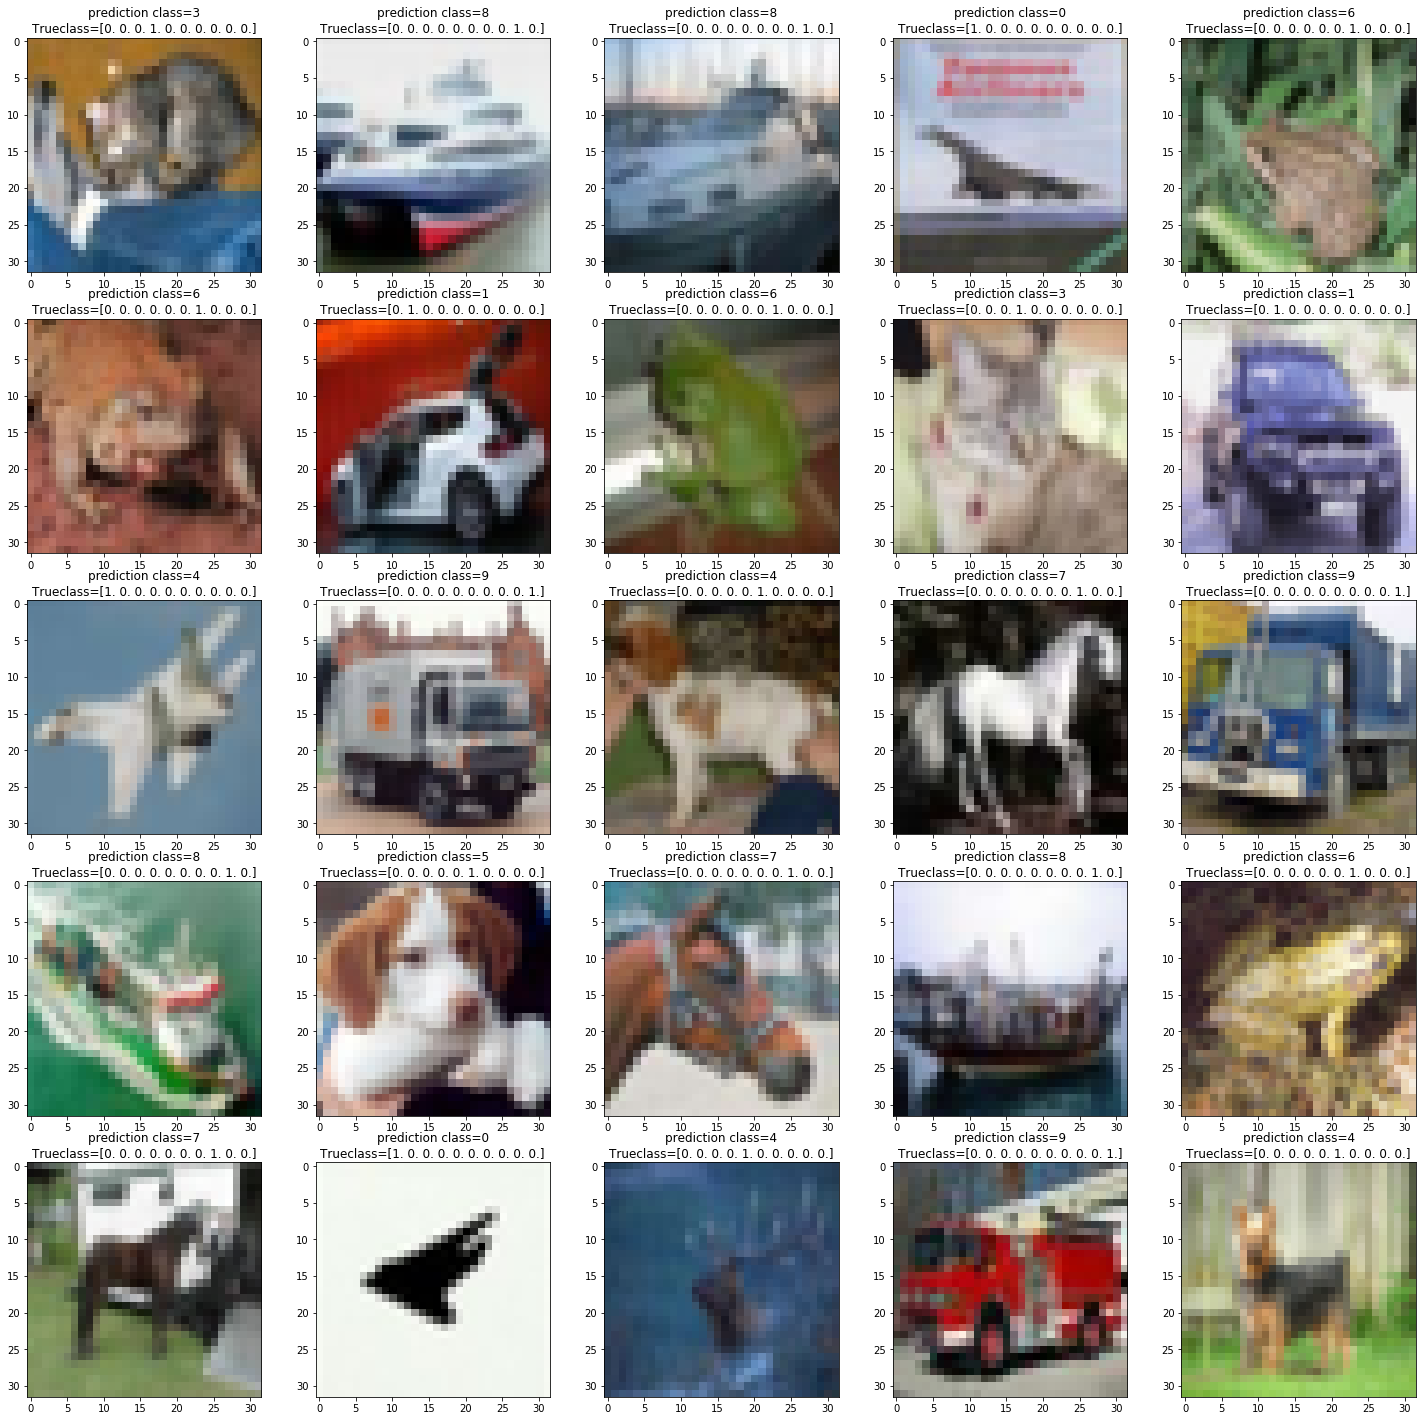

In [94]:
w=5
l=5
fig, axes=plt.subplots(l,w,figsize=(25,25))
axes=axes.ravel()
for i in np.arange(0,(l*w)):
  
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction class={}\nTrueclass={}'.format(pred[i],y_test[i]))


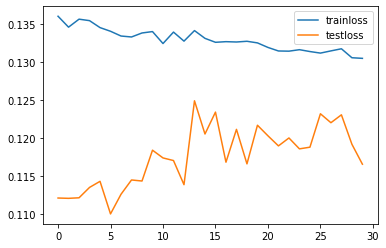

<Figure size 432x288 with 0 Axes>

In [95]:
plt.plot(r.history['loss'],label='trainloss')
plt.plot(r.history['val_loss'],label='testloss')
plt.legend()
plt.show()
plt.savefig('losses')


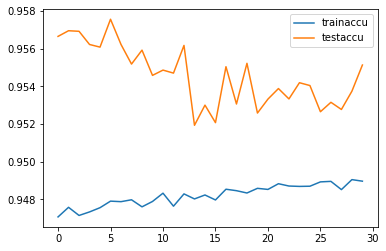

<Figure size 432x288 with 0 Axes>

In [97]:
plt.plot(r.history['acc'],label='trainaccu')
plt.plot(r.history['val_acc'],label='testaccu')
plt.legend()
plt.show()
plt.savefig('accuracies')